## Problem: Find Hamiltonian path and cycle in a directed graph

###Algorithm Steps

Initialization
```
Represent the graph as an adjacency matrix A of size n × n.

Initialize empty lists to store all Hamiltonian paths (all_paths) and cycles (all_cycles).

```


Backtracking Function
```
Define a recursive backtrack(current_path, visited) function:

*   Base Case: If current_path contains all n vertices:

    Check if the last vertex connects to the first (to form a cycle).

    Add the path to all_paths (and to all_cycles if it’s a cycle).

*   Recursive Case: For the last vertex in current_path:

    Explore all unvisited neighbors (A[last_node][neighbor] == 1 and not visited[neighbor]).

    Mark the neighbor as visited, add it to current_path, and recurse.

    Backtrack by unmarking the neighbor and removing it from current_path.

```

Start from Each Vertex
```
For each vertex start_node (0 to n-1):

  Mark start_node as visited.

  Begin backtracking with current_path = [start_node].

```
    
Output Results
```
 Print all Hamiltonian paths and cycles found.

```    

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
def generate_adjacency_matrix(n):
    """Generates a random adjacency matrix for a directed graph with n vertices."""
    np.random.seed(42)  # For reproducibility
    A = np.random.randint(0, 2, (n, n))  # Random adjacency matrix (0s and 1s)
    np.fill_diagonal(A, 0)  # Remove self-loops
    return A


In [3]:
def plot_graph(A):
    """Plots the directed graph represented by the adjacency matrix A."""
    G = nx.DiGraph(A)
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
           node_size=500, font_size=8, font_weight='bold',
           edge_color='gray', arrows=True)
    plt.title("Directed Graph")
    plt.show()


In [4]:
def hamiltonian_paths_and_cycles(A):
    """Finds all Hamiltonian paths and cycles in a directed graph."""
    n = len(A)
    G = nx.DiGraph(A)
    all_paths = []
    all_cycles = []

    def backtrack(current_path, visited):
        if len(current_path) == n:
            # Check if it's a cycle (last node connects to first)
            if A[current_path[-1]][current_path[0]] == 1:
                all_cycles.append(current_path.copy())
            all_paths.append(current_path.copy())
            return

        last_node = current_path[-1]
        for neighbor in range(n):
            if A[last_node][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                current_path.append(neighbor)
                backtrack(current_path, visited)
                current_path.pop()
                visited[neighbor] = False

    for start_node in range(n):
        visited = [False] * n
        visited[start_node] = True
        backtrack([start_node], visited)

    return all_paths, all_cycles


Adjacency Matrix:
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 1]
 [1 0 0 1 0 0]
 [1 1 0 0 1 0]]


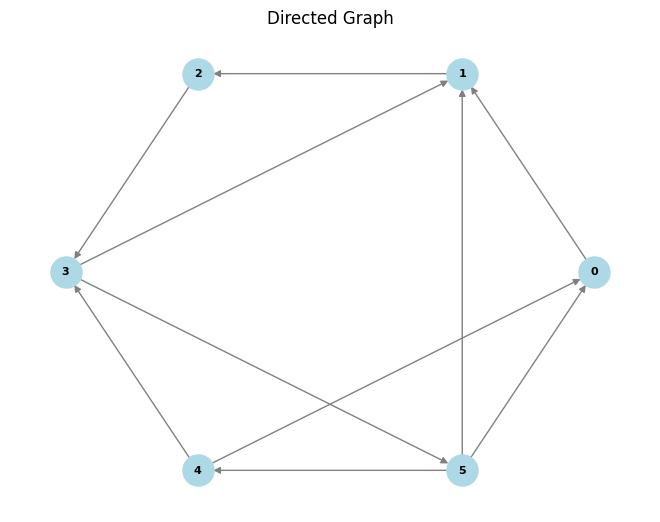


Hamiltonian Paths:
1. 0 -> 1 -> 2 -> 3 -> 5 -> 4
2. 1 -> 2 -> 3 -> 5 -> 4 -> 0
3. 2 -> 3 -> 5 -> 4 -> 0 -> 1
4. 3 -> 5 -> 4 -> 0 -> 1 -> 2
5. 4 -> 0 -> 1 -> 2 -> 3 -> 5
6. 4 -> 3 -> 5 -> 0 -> 1 -> 2
7. 5 -> 4 -> 0 -> 1 -> 2 -> 3

Hamiltonian Cycles:
1. 0 -> 1 -> 2 -> 3 -> 5 -> 4 -> 0
2. 1 -> 2 -> 3 -> 5 -> 4 -> 0 -> 1
3. 2 -> 3 -> 5 -> 4 -> 0 -> 1 -> 2
4. 3 -> 5 -> 4 -> 0 -> 1 -> 2 -> 3
5. 4 -> 0 -> 1 -> 2 -> 3 -> 5 -> 4
6. 5 -> 4 -> 0 -> 1 -> 2 -> 3 -> 5


In [5]:
# Adjacency matrix that has both Hamiltonian path and cycle
A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 1, 0]
])

print("Adjacency Matrix:")
print(A)
plot_graph(A)

paths, cycles = hamiltonian_paths_and_cycles(A)

print("\nHamiltonian Paths:")
for i, path in enumerate(paths, 1):
    print(f"{i}. {' -> '.join(map(str, path))}")

print("\nHamiltonian Cycles:")
for i, cycle in enumerate(cycles, 1):
    print(f"{i}. {' -> '.join(map(str, cycle))} -> {cycle[0]}")

Adjacency Matrix:
[[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]
 [1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1]
 [0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0]
 [1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1]
 [0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1]
 [1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1]
 [0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1]
 [0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0]
 [1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0]
 [1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0]]


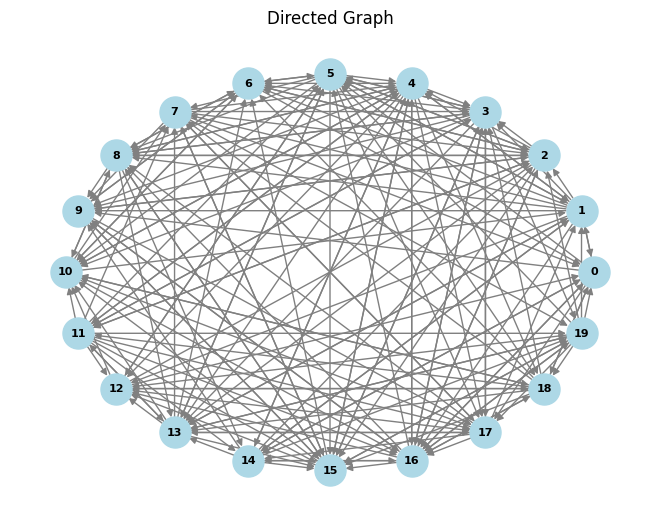

In [ ]:
# our problem for 20 vertices directed graph
n = 20
A = generate_adjacency_matrix(n)

print("Adjacency Matrix:")
print(A)
plot_graph(A)

paths, cycles = hamiltonian_paths_and_cycles(A)

print("\nHamiltonian Paths:")
for i, path in enumerate(paths, 1):
    print(f"{i}. {' -> '.join(map(str, path))}")

print("\nHamiltonian Cycles:")
for i, cycle in enumerate(cycles, 1):
    print(f"{i}. {' -> '.join(map(str, cycle))} -> {cycle[0]}")